In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rsscn7/RSSCN7-master/README.md
/kaggle/input/rsscn7/RSSCN7-master/eForest/e315.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e121.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e308.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e145.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e391.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e313.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e380.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e104.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e246.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e129.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e304.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e201.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e084.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e353.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e358.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e016.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e065.jpg
/kaggle/input/rsscn7/RSSCN7-master/eForest/e386.jpg
/kaggle/input/rsscn

In [42]:
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pathlib import Path
import pathlib
# necessary libraries
import os

import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
from skimage.io import imread
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

In [5]:
path=Path("/kaggle/input/rsscn7/RSSCN7-master")

In [6]:
def get_Label(number):
    labels = {


              0 : 'aGrass',
              1 : 'bField',
              2 : 'cIndustry',
              3 : 'dRiverLake',
              4 : 'eForest',
              5 : 'fResident',
              6 : 'gParking'
    }
    return labels[number]

In [7]:
def plot_predection(model_name):
    plt.figure(figsize=(20,15))
    plt.suptitle("Prediction  Images", fontsize=20)
    count = 0
    for i in range (35) :
        plt.subplot(5,7,i+1)
        img = plt.imread(df['image'].iloc[i])
        img = cv2.resize(img,(224,224))
        plt.imshow(img,cmap=plt.cm.binary)
        img = np.expand_dims(img, axis=0)
        feature = model_name.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("A : "+df['label'].iloc[i],fontsize=12,color='red')
        plt.ylabel("P :"+get_Label(int(predection)),fontsize=12,color ='green')
        count += 1
        if count == 34 :
            break


In [8]:
def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,7))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

In [9]:
def freezing_layers(model_name):
    for layer in model_name.layers:
      layer.trainable = False

In [10]:
import os.path
from sklearn.model_selection import train_test_split

In [12]:
filepaths=list(path.glob(r'**/*.jpg'))
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
filepaths=pd.Series(filepaths,name='Filepaths').astype(str)
labels=pd.Series(labels,name='Label')
images=pd.concat([filepaths,labels],axis=1)
category_samples=[]

for category in images['Label'].unique():
    category_slices=images.query('Label==@category')
    category_samples.append(category_slices.sample(frac=1,random_state=1))
image_df=pd.concat(category_samples,axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)

In [13]:
image_df

,Filepaths,Label
0,/kaggle/input/rsscn7/RSSCN7-master/fResident/f...,fResident
1,/kaggle/input/rsscn7/RSSCN7-master/gParking/g3...,gParking
2,/kaggle/input/rsscn7/RSSCN7-master/cIndustry/c...,cIndustry
3,/kaggle/input/rsscn7/RSSCN7-master/gParking/g2...,gParking
4,/kaggle/input/rsscn7/RSSCN7-master/dRiverLake/...,dRiverLake
...,...,...
2795,/kaggle/input/rsscn7/RSSCN7-master/aGrass/a076...,aGrass
2796,/kaggle/input/rsscn7/RSSCN7-master/gParking/g2...,gParking
2797,/kaggle/input/rsscn7/RSSCN7-master/gParking/g0...,gParking
2798,/kaggle/input/rsscn7/RSSCN7-master/eForest/e32...,eForest


In [14]:
image_df['Label'].value_counts()

fResident     400
gParking      400
cIndustry     400
dRiverLake    400
aGrass        400
bField        400
eForest       400
Name: Label, dtype: int64

In [15]:
train_df,test_df=train_test_split(image_df,train_size=0.7,shuffle=True,random_state=1)

In [16]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [17]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1568 validated image filenames belonging to 7 classes.
Found 391 validated image filenames belonging to 7 classes.
Found 841 validated image filenames belonging to 7 classes.


In [18]:
pretrained_model=tf.keras.applications.MobileNetV2(
     input_shape=(224,224,3),
     include_top=False,
     weights='imagenet',
     pooling='avg'

)
pretrained_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [19]:
inputs=pretrained_model.input
x=tf.keras.layers.Dense(128,activation='relu')(pretrained_model.output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
outputs=tf.keras.layers.Dense(7,activation='softmax')(x)
model=tf.keras.Model(inputs,outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
49/49 [==============================] - 28s 317ms/step - loss: 0.7561 - accuracy: 0.7136 - val_loss: 0.3679 - val_accuracy: 0.8645
Epoch 2/5
49/49 [==============================] - 8s 167ms/step - loss: 0.2990 - accuracy: 0.8897 - val_loss: 0.4327 - val_accuracy: 0.8517
Epoch 3/5
49/49 [==============================] - 8s 171ms/step - loss: 0.1877 - accuracy: 0.9337 - val_loss: 0.3335 - val_accuracy: 0.8926
Epoch 4/5
49/49 [==============================] - 9s 182ms/step - loss: 0.1115 - accuracy: 0.9656 - val_loss: 0.2885 - val_accuracy: 0.9054
Epoch 5/5
49/49 [==============================] - 9s 179ms/step - loss: 0.0579 - accuracy: 0.9866 - val_loss: 0.3208 - val_accuracy: 0.9028


In [21]:
results = model.evaluate(test_images, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 89.66%


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [27]:
predictions = np.argmax(model.predict(test_images), axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

27/27 [==============================] - 3s 128ms/step


In [28]:
print(clr)

              precision    recall  f1-score   support

      aGrass       0.88      0.87      0.87       126
      bField       0.84      0.93      0.88       122
   cIndustry       0.82      0.90      0.86       115
  dRiverLake       0.94      0.93      0.94       119
     eForest       0.96      0.91      0.94       119
   fResident       0.95      0.90      0.92       118
    gParking       0.91      0.84      0.87       122

    accuracy                           0.90       841
   macro avg       0.90      0.90      0.90       841
weighted avg       0.90      0.90      0.90       841



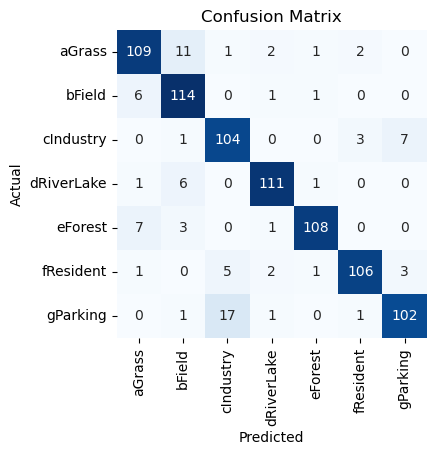

In [33]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(7) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(7) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

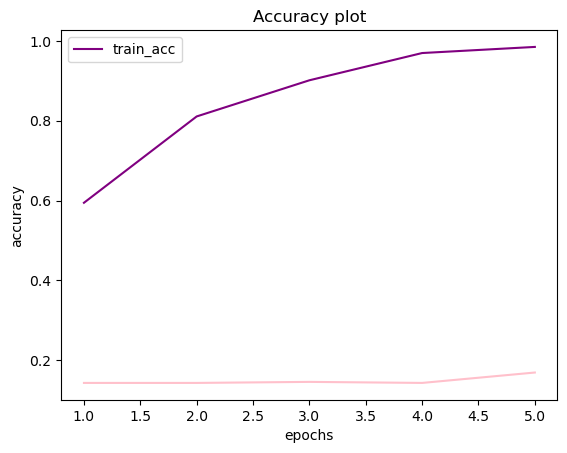

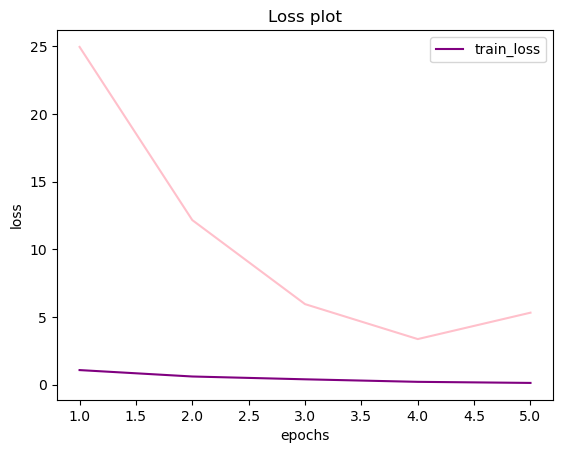

In [54]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss"])
plt.show()

27/27 [==============================] - 4s 141ms/step


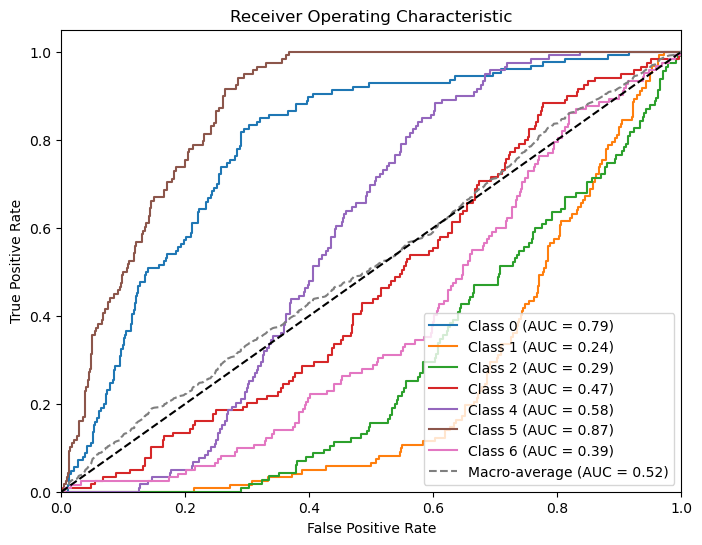

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Get model predictions
predictions = model.predict(test_images)
n_classes = predictions.shape[1]  # Number of classes

# Binarize the true labels
y_true = label_binarize(test_images.labels, classes=range(n_classes))

# Initialize variables
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {roc_auc_macro:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


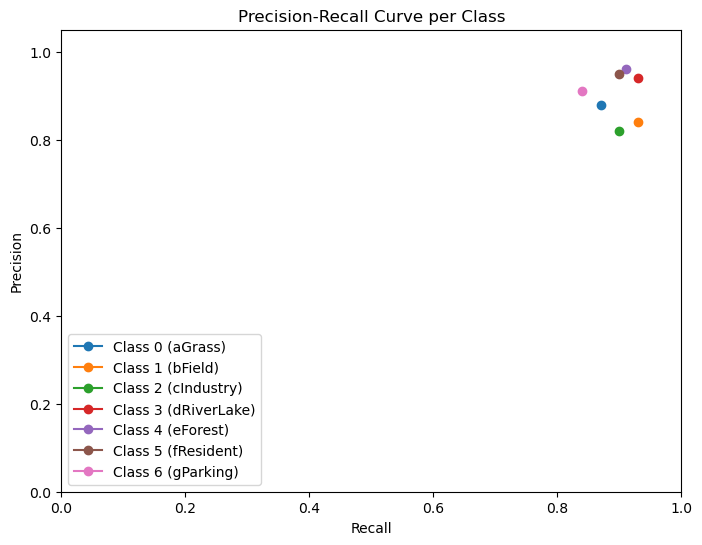

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Replace with your precision, recall, and F1-score values
precision = [0.88, 0.84, 0.82, 0.94, 0.96, 0.95, 0.91]
recall = [0.87, 0.93, 0.90, 0.93, 0.91, 0.90, 0.84]
f1_score = [0.87, 0.88, 0.86, 0.94, 0.94, 0.92, 0.87]
class_names = ['aGrass', 'bField', 'cIndustry', 'dRiverLake', 'eForest', 'fResident', 'gParking']

plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], marker='o', label=f'Class {i} ({class_names[i]})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend(loc="lower left")
plt.show()


# VGG19

